In [1]:
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as se

In [2]:
data = pd.read_csv("Iris.csv")
data

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...,...
145,145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
data.drop(["index","Id"],axis=1,inplace=True)
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


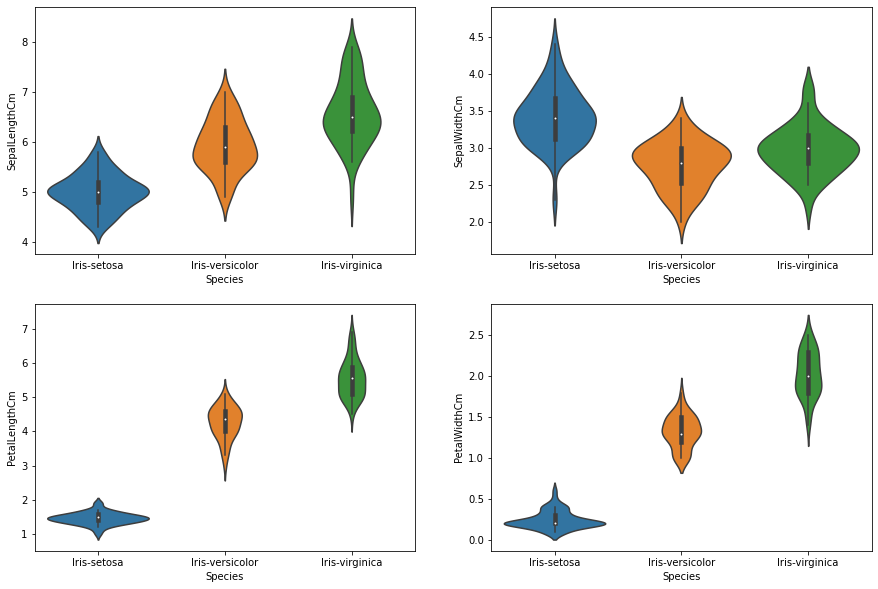

In [5]:
mlt.figure(figsize=(15,10))
mlt.subplot(2,2,1)
se.violinplot(x='Species',y='SepalLengthCm',data=data)
mlt.subplot(2,2,2)
se.violinplot(x='Species',y='SepalWidthCm',data=data)
mlt.subplot(2,2,3)
se.violinplot(x='Species',y='PetalLengthCm',data=data)
mlt.subplot(2,2,4)
se.violinplot(x='Species',y='PetalWidthCm',data=data)
mlt.show()

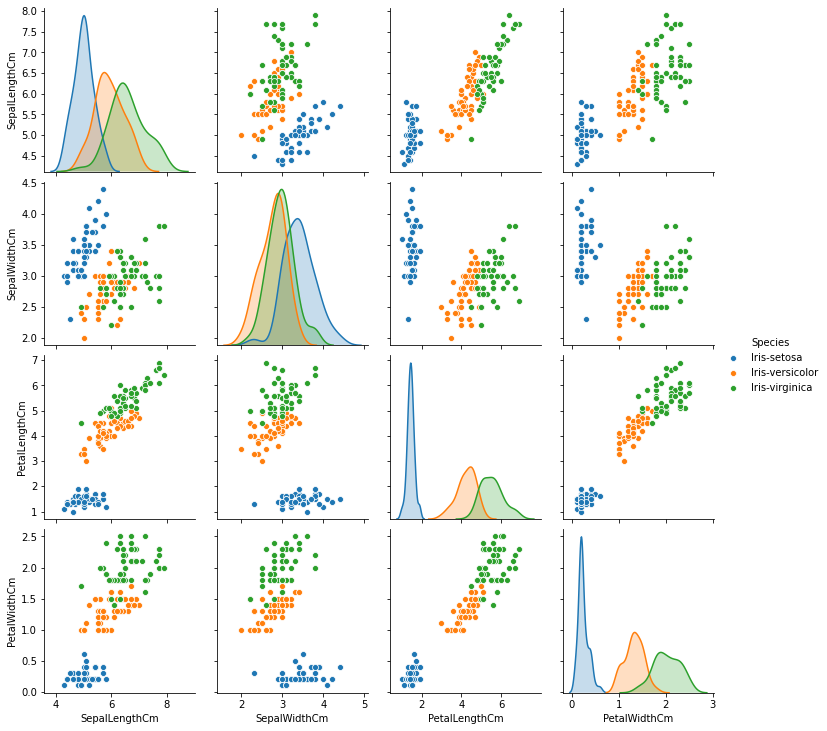

In [6]:
se.pairplot(data=data,hue="Species")
mlt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Species"] = le.fit_transform(data["Species"])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
x=data.drop("Species",axis=1)
y=data["Species"]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=10)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
y_predict = knn.predict(x_test)
y_predict

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38

[[11  0  0]
 [ 0 14  1]
 [ 0  0 12]]
0.9736842105263158


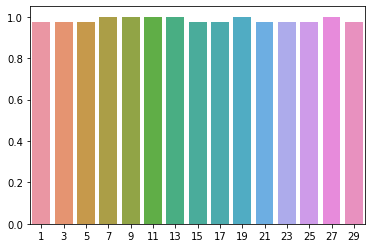

In [13]:
l=[]
l1=[]
for i in range(1,31):
    if i%2!=0:
        l1.append(i)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=10)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        y_predict = knn.predict(x_test)
        a=accuracy_score(y_test,y_predict)
        l.append(a)
se.barplot(l1,l)
mlt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
sec = StandardScaler()
data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]] = sec.fit_transform(data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=10)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
print(accuracy_score(y_test,y_predict))

0.9736842105263158
